In [2]:
import datajoint as dj
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [2]:
# To access archived clustering results - access to S3 store is needed
# please contact MAP admin team to request S3 credentials - "access_key" and "secret_key"
dj.config['stores'] = {
        "archive_store":  {
            "protocol": "s3",
            "endpoint": "s3.amazonaws.com",
            "access_key": "****************",
            "secret_key": "****************",
            "bucket": "map-cluster-archive",
            "location": "/cluster_archive"
        }
    }

In [3]:
from pipeline import lab, experiment, ephys, histology, ccf

Connecting thinh@datajoint.mesoscale-activity-map.org:3306


In [4]:
from pipeline.plot import behavior_plot, unit_characteristic_plot, unit_psth

# Reingestion status

In [5]:
subjects_to_archive = ("SC011", "SC013", "SC015", "SC016", "SC017",
                       "SC022", "SC023", "SC026", "SC027", "SC030",
                       "SC031", "SC032", "SC033", "SC035", "SC038",
                       "SC043", "SC045", "SC048", "SC049", "SC050",
                       "SC052", "SC053", "SC060", "SC061", "SC064",
                       "SC065", "SC066", "SC067")

In [6]:
subject_keys = (lab.Subject * lab.WaterRestriction.proj('water_restriction_number')
                & f'water_restriction_number in {subjects_to_archive}').fetch('KEY')

In [7]:
to_be_archived_insertions = ephys.ProbeInsertion & ephys.Unit.proj() - ephys.ArchivedClustering & subject_keys
to_be_archived_insertions

subject_id institution 6 digit animal ID,session session number,insertion_number,probe unique identifier for this model of probe (e.g. part number),probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name


In [8]:
archived_insertions = ephys.ProbeInsertion & ephys.ArchivedClustering & subject_keys
archived_insertions

subject_id institution 6 digit animal ID,session session number,insertion_number,probe unique identifier for this model of probe (e.g. part number),probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name
440956,1,1,17131309211,neuropixels 1.0 - 3B,1-281
440956,1,2,17216703352,neuropixels 1.0 - 3B,1-281
440956,1,3,18005118502,neuropixels 1.0 - 3B,1-384
440956,1,4,18005117122,neuropixels 1.0 - 3B,1-384
440956,2,1,18005110031,neuropixels 1.0 - 3B,1-281
440956,2,2,18005117412,neuropixels 1.0 - 3B,1-281
440956,2,3,18005118502,neuropixels 1.0 - 3B,1-384


In [9]:
reingested_insertions = ephys.ProbeInsertion & ephys.ArchivedClustering & ephys.Unit.proj() & subject_keys
reingested_insertions

subject_id institution 6 digit animal ID,session session number,insertion_number,probe unique identifier for this model of probe (e.g. part number),probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name
440956,1,1,17131309211,neuropixels 1.0 - 3B,1-281
440956,1,2,17216703352,neuropixels 1.0 - 3B,1-281
440956,1,3,18005118502,neuropixels 1.0 - 3B,1-384
440956,1,4,18005117122,neuropixels 1.0 - 3B,1-384
440956,2,1,18005110031,neuropixels 1.0 - 3B,1-281
440956,2,2,18005117412,neuropixels 1.0 - 3B,1-281
440956,2,3,18005118502,neuropixels 1.0 - 3B,1-384


# New clustering results comparison

In [10]:
session_key = {'subject_id': 449141, 'session': 10}

In [11]:
ephys.ProbeInsertion & session_key & ephys.Unit.proj() & ephys.ArchivedClustering

subject_id institution 6 digit animal ID,session session number,insertion_number,probe unique identifier for this model of probe (e.g. part number),probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name
449141,10,1,17216703352,neuropixels 1.0 - 3B,1-301
449141,10,2,17131309211,neuropixels 1.0 - 3B,1-301
449141,10,3,18005107812,neuropixels 1.0 - 3B,1-384
449141,10,4,18005107871,neuropixels 1.0 - 3B,1-384


In [12]:
insertion_key = {'subject_id': 449141, 'session': 10, 'insertion_number': 1}

In [13]:
ephys.ArchivedClustering & insertion_key

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,clustering_time time of generation of this set of clustering results,archival_time time of archiving,quality_control has this clustering results undergone quality control,manual_curation is manual curation performed on this clustering result,clustering_note
449141,10,1,kilosort2,2020-02-27 06:20:03,2022-07-07 10:48:04,1,0,None


In [14]:
archived_clustering_key = {'subject_id': 449141, 'session': 10, 'insertion_number': 1,
                'clustering_method': 'kilosort2', 'clustering_time': '2020-02-27 06:20:03'}

In [15]:
units_query = ephys.Unit & insertion_key

In [16]:
archived_units_query = ephys.ArchivedClustering.Unit & archived_clustering_key

In [17]:
units_query

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_uid unique across sessions/animals,unit_quality,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name,electrode_group electrode group,"electrode electrode index, starts at 0","unit_posx (um) estimated x position of the unit relative to probe's tip (0,0)","unit_posy (um) estimated y position of the unit relative to probe's tip (0,0)",spike_times (s) from the start of the first data point used in clustering,spike_sites array of electrode associated with each spike,spike_depths (um) array of depths associated with each spike,unit_amp,unit_snr,waveform average spike waveform
449141,10,1,kilosort2,0,0,multi,neuropixels 1.0 - 3B,1-301,0,2,59.0,0.0,=BLOB=,=BLOB=,=BLOB=,66.3325471698113,3.530728018529445,=BLOB=
449141,10,1,kilosort2,1,1,multi,neuropixels 1.0 - 3B,1-301,0,1,27.0,0.0,=BLOB=,=BLOB=,=BLOB=,57.78027540241448,3.152393828546015,=BLOB=
449141,10,1,kilosort2,2,2,good,neuropixels 1.0 - 3B,1-301,0,3,11.0,20.0,=BLOB=,=BLOB=,=BLOB=,53.80676498127342,2.974423926906651,=BLOB=
449141,10,1,kilosort2,3,3,good,neuropixels 1.0 - 3B,1-301,0,4,43.0,20.0,=BLOB=,=BLOB=,=BLOB=,95.04608294930875,5.128615657954862,=BLOB=
449141,10,1,kilosort2,4,4,good,neuropixels 1.0 - 3B,1-301,0,11,11.0,100.0,=BLOB=,=BLOB=,=BLOB=,40.06017736486486,2.0630337617750723,=BLOB=
449141,10,1,kilosort2,5,5,good,neuropixels 1.0 - 3B,1-301,0,7,11.0,60.0,=BLOB=,=BLOB=,=BLOB=,48.046875,2.493574130856696,=BLOB=
449141,10,1,kilosort2,6,6,multi,neuropixels 1.0 - 3B,1-301,0,7,11.0,60.0,=BLOB=,=BLOB=,=BLOB=,62.611607142857146,3.025581419850081,=BLOB=


In [18]:
archived_units_query

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,clustering_time time of generation of this set of clustering results,unit,unit_quality,cell_type,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name,electrode_group electrode group,"electrode electrode index, starts at 0","unit_posx (um) estimated x position of the unit relative to probe's tip (0,0)","unit_posy (um) estimated y position of the unit relative to probe's tip (0,0)",spike_times (s) from the start of the first data point used in clustering,spike_sites array of electrode associated with each spike,spike_depths (um) array of depths associated with each spike,trial_spike array of trial numbering per spike - same size as spike_times,waveform average spike waveform
449141,10,1,kilosort2,2020-02-27 06:20:03,0,multi,FS,neuropixels 1.0 - 3B,1-301,0,2,59.0,0.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
449141,10,1,kilosort2,2020-02-27 06:20:03,1,multi,Pyr,neuropixels 1.0 - 3B,1-301,0,4,43.0,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
449141,10,1,kilosort2,2020-02-27 06:20:03,2,multi,FS,neuropixels 1.0 - 3B,1-301,0,1,27.0,0.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
449141,10,1,kilosort2,2020-02-27 06:20:03,3,good,FS,neuropixels 1.0 - 3B,1-301,0,3,11.0,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
449141,10,1,kilosort2,2020-02-27 06:20:03,4,good,FS,neuropixels 1.0 - 3B,1-301,0,3,11.0,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
449141,10,1,kilosort2,2020-02-27 06:20:03,5,good,FS,neuropixels 1.0 - 3B,1-301,0,4,43.0,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
449141,10,1,kilosort2,2020-02-27 06:20:03,6,good,FS,neuropixels 1.0 - 3B,1-301,0,11,11.0,100.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


# Clustering quality

In [19]:
probe_insertion = ephys.ProbeInsertion & insertion_key

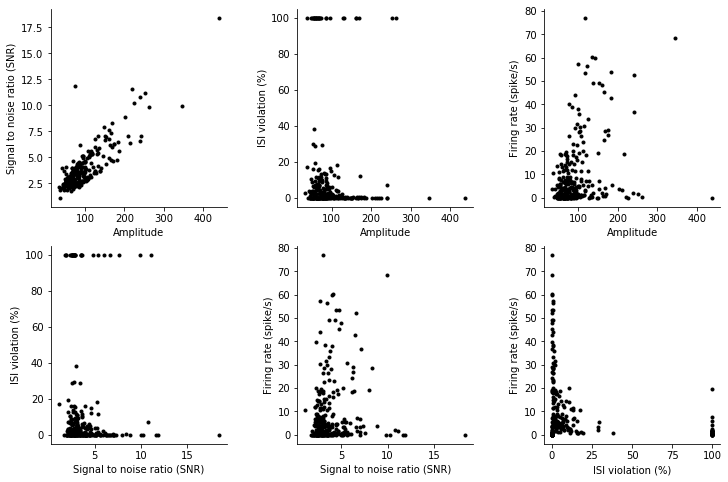

In [20]:
fig1 = unit_characteristic_plot.plot_clustering_quality(probe_insertion)

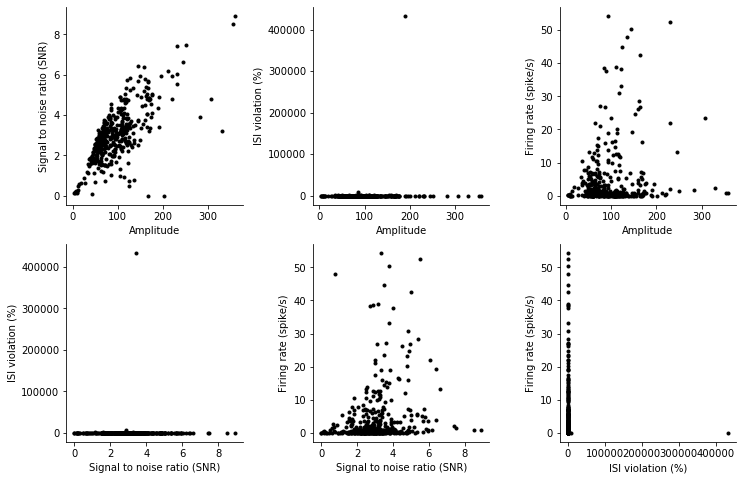

In [21]:
fig2 = unit_characteristic_plot.plot_clustering_quality(probe_insertion, archived_clustering_key=archived_clustering_key)

# Driftmap

In [22]:
probe_insertion = ephys.ProbeInsertion & insertion_key
shanks = probe_insertion.aggr(lab.ElectrodeConfig.Electrode * lab.ProbeType.Electrode,
                              shanks='GROUP_CONCAT(DISTINCT shank SEPARATOR ", ")').fetch1('shanks')
shanks = np.array(shanks.split(', ')).astype(int)

In [23]:
shank = 1

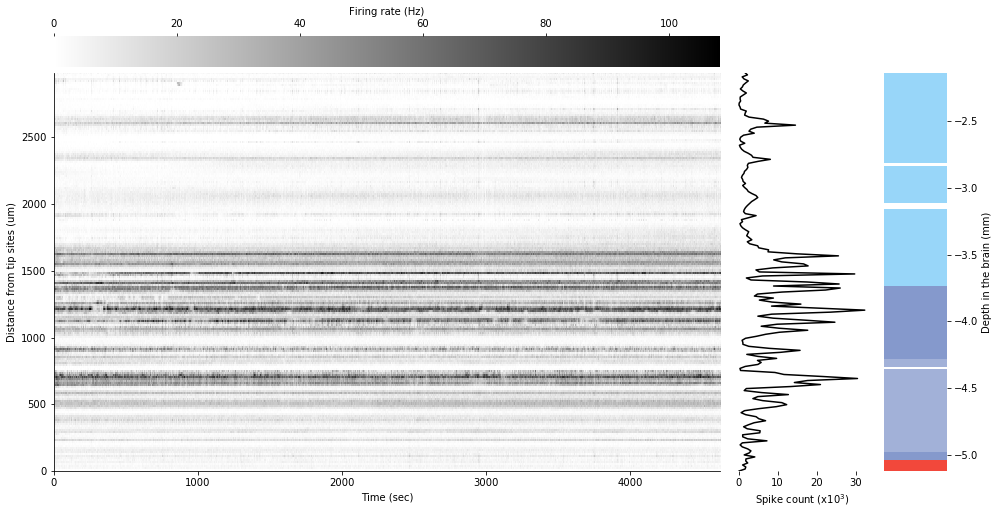

In [24]:
fig3 = unit_characteristic_plot.plot_driftmap(probe_insertion, shank_no=shank)

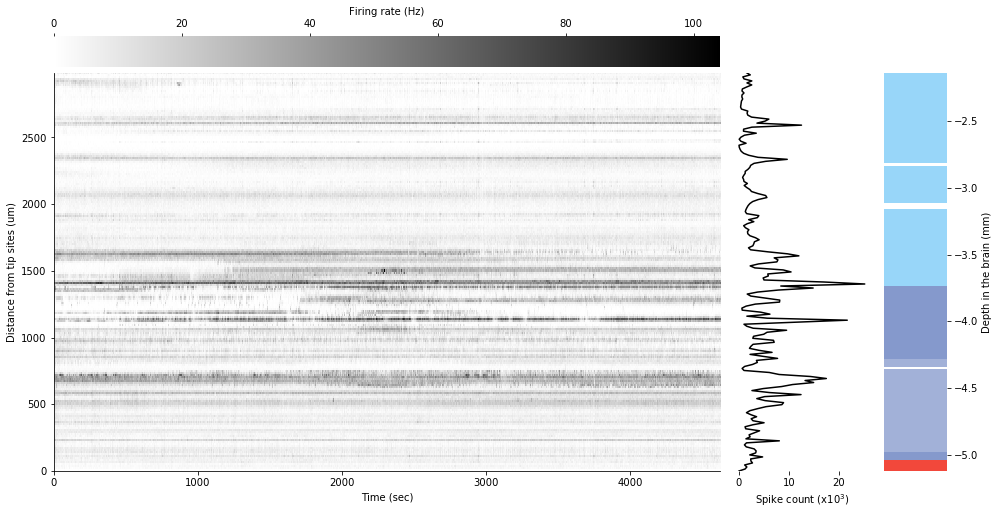

In [25]:
fig4 = unit_characteristic_plot.plot_driftmap(probe_insertion, shank_no=shank, 
                                              archived_clustering_key=archived_clustering_key)